<a href="https://colab.research.google.com/github/Nikhil-2612/Olympic_Dataset_Analysis/blob/main/Olympic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Olympic Dataset Analysis ( 1896-2016)**

In [1]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Olympic Dataset for Analysis
athletes = pd.read_csv('/content/athlete_events.csv')
regions = pd.read_csv('/content/noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


**Let's check the descriptive statistics of the dataset.**

In [5]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
athletes[['Age','Height','Weight']].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


**From the descriptive statistics we can conclude few things:**
1. The average age, weight, and height of all athletes are around 25.5 years, 70 kg, and 175 cm tall.
2. The youngest player in Olympic history was only 10 years old, and the oldest was 97 years old.
3. The player with the smallest height was only 127 cm, and the tallest was 226 cm.

Joining the both Dataset

In [7]:
olympic = athletes.merge(regions, how = 'left', on = 'NOC')

In [10]:
# Let's take a look at who is the youngest player in the history of the Olympics.
olympic.query("Age== 10")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece,NaN


In [11]:
# Checking the shape of the dataset (no. of rows and columns)
olympic.shape

(271116, 17)

In [8]:
# Let's check if there is any null value in Age column.
olympic[((pd.isnull(olympic['Age'])))]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN,Iran,NaN
152,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN,Bulgaria,NaN
153,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN,Bulgaria,NaN
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN,Sudan,NaN
212,102,Sayed Fahmy Abaza,M,NaN,NaN,NaN,Egypt,EGY,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Egypt,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270679,135368,Antonio A. Zucchi,M,NaN,NaN,NaN,Argentina,ARG,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
270774,135416,Star Zulu,M,NaN,NaN,NaN,Zambia,ZAM,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Bantamweight,NaN,Zambia,NaN
270793,135426,Max Zumstein,M,NaN,NaN,NaN,Switzerland,SUI,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,NaN,Switzerland,NaN
270804,135434,Edmundo Ziga Erraz,M,NaN,180.0,95.0,Chile,CHI,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Hammer Throw,NaN,Chile,NaN


In [12]:
# Columns names
olympic.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

2. # #Let's Clean the Dataset

   region and notes column name are not capitalized

In [13]:
# Renaming the column name
olympic.rename(columns={'region': 'Region', 'notes': 'Notes'}, inplace = 1)
olympic.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [14]:
# Checking for null value columns
olympic.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

We can see in the Medal column that the number of null values is way larger than the other columns:
  > Reason: Many players participated in the Olympics, but they did not win any medals.


In [15]:
# Let's check if there is a missing data for Age, or for Height, or for Weight and a Athlete won a Medal in Olympic.

olympic[~(((pd.notnull(olympic['Height'])) | (pd.notnull(olympic['Weight']) | (pd.notnull(olympic['Age'])))& (pd.isnull(olympic['Medal'])))) ]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
86,25,Alf Lied Aanning,M,24.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver,Norway,NaN
91,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270914,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,Silver,Switzerland,NaN
270915,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,Silver,Switzerland,NaN
270917,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Switzerland,NaN
270960,135498,Denis vegelj,M,20.0,NaN,NaN,Slovenia,SLO,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxless Pairs,Bronze,Slovenia,NaN


We can see that some players who won medals in the Olympics have null values in the Age, Height, or in Weight columns. So we should not delete all null values from the data directly.

In [16]:
''' Let's remove the data from the dataframe where Age, Height, Weight and Medals all four columns have null values.
As these data is not much of importance for further analysis.'''

Olympic_2 = olympic[~((pd.isnull(olympic['Height']))& (pd.isnull(olympic['Weight'])& (pd.isnull(olympic['Age']))& (pd.isnull(olympic['Medal'])))) ]

In [17]:
Olympic_2.shape

(263386, 17)

In [18]:
# Let's check for the duplicated values.
Olympic_2.duplicated().sum()

1230

In [ ]:
# Let's remove these duplicate values
Olympic_2.drop_duplicates(keep='first', inplace = True)

In [21]:
Olympic_2.shape

(262156, 17)

# # Let's query our data

In [22]:
# Curious about Milkha Singh (Let's see the details of Milkha Singh)
Olympic_2.query('Name == "Milkha Singh"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
221116,111108,Milkha Singh,M,21.0,172.0,66.0,India,IND,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's 200 metres,NaN,India,NaN
221117,111108,Milkha Singh,M,21.0,172.0,66.0,India,IND,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's 400 metres,NaN,India,NaN
221118,111108,Milkha Singh,M,24.0,172.0,66.0,India,IND,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 400 metres,NaN,India,NaN
221119,111108,Milkha Singh,M,28.0,172.0,66.0,India,IND,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,India,NaN


In [23]:
# print the details of the Indian athletes who have won Gold medal recently in olympic
Olympic_2.query('Team == "India" and Medal == "Gold"').sort_values(by = 'Year', ascending = False).head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
22004,11601,Abhinav Bindra,M,25.0,173.0,70.0,India,IND,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India,NaN
114736,58105,Maharaj Krishon Kaushik,M,25.0,163.0,60.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN
39986,20565,Bir Bahadur Chettri,M,24.0,165.0,68.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN
148265,74392,Somaya Muttana Maneypandey,M,21.0,179.0,69.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN
196780,98793,Amarjit Singh Rana,M,20.0,175.0,63.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN
221361,111257,Surinder Singh Sodhi Shokar,M,23.0,178.0,83.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN
68342,34901,Merwyn Fernandis,M,21.0,159.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN
213801,107366,Allan Schofield,M,23.0,169.0,64.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN
217267,109138,Muhammad Shahid,M,20.0,160.0,66.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN
128900,64889,Charanjit Kumar,M,24.0,174.0,73.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN


In [24]:
# Comparison of India and China
India = olympic.query('Team == "India"').describe()
China = olympic.query('Team == "China"').describe()
print(India)
print (China)

                  ID          Age      Height      Weight         Year
count    1400.000000  1250.000000  887.000000  865.000000  1400.000000
mean    76701.817143    25.508000  171.577227   67.682659  1978.825714
std     38073.641662     5.171705    9.582507   14.340968    26.931590
min       281.000000    15.000000  137.000000   43.000000  1900.000000
25%     46736.000000    22.000000  165.000000   58.000000  1956.000000
50%     86988.000000    25.000000  172.000000   65.000000  1980.000000
75%    111071.250000    28.000000  178.000000   74.000000  2004.000000
max    135480.000000    66.000000  200.000000  125.000000  2016.000000
                  ID          Age       Height       Weight         Year
count    4975.000000  4950.000000  4720.000000  4722.000000  4975.000000
mean    90166.868945    22.949091   172.600000    66.460504  2000.109749
std     40012.106511     4.097794    11.867735    14.921385    13.186974
min         1.000000    11.000000   136.000000    28.000000  1932.000

**Some Insight from above descriptive stats:**

1. The average age of Chinese players is around 23 years, while in India it is around 25.5 years.
2. The Chinese players height is 172.6 cm, which is 1 cm taller than the Indian players (171.5 cm) on average.
3. The weight of Chinese players is around 66.4 kg, whereas Indian players weigh 67.6 kg on average.

We can conclude from the descriptive statistics that differences in Age, Height and Weight can be one of the reasons why Chinese players performed well in the Olympics and won more medals than Indian players. Because they are younger and leaner than Indian players.



In [25]:
# Find top 10 countries with most participation rate in olympics since 1950
top_10_countries = Olympic_2.query('Year > 1950').Team.value_counts().sort_values(ascending = False).head(10)
top_10_countries

United States    13004
Italy             8150
France            8095
Canada            8054
Great Britain     7860
Japan             7540
Germany           7291
Australia         7133
Sweden            5540
Poland            5460
Name: Team, dtype: int64

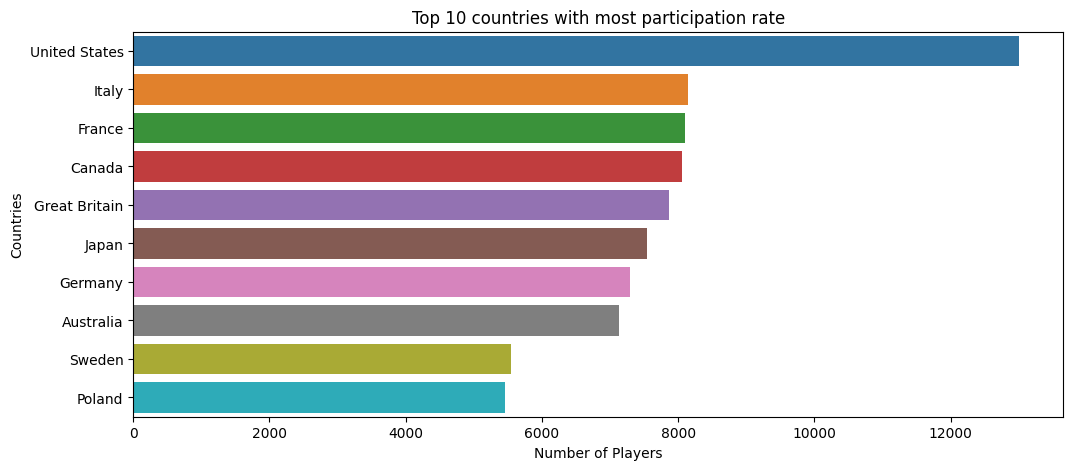

In [26]:
# Graphical representation of Top 10 countries with most participation rate.
plt.figure(figsize=(12,5))
sns.barplot(x=top_10_countries, y=top_10_countries.index)
plt.title("Top 10 countries with most participation rate")
plt.xlabel('Number of Players')
plt.ylabel('Countries')
plt.show()

In [27]:
# Print the name of sports played in Winter Olympic
winter_games = [Olympic_2[Olympic_2.Season == 'Winter'].Sport.unique()]
winter_games

[array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
        'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
        'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
        'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
        'Military Ski Patrol', 'Alpinism'], dtype=object)]

In [28]:
# Print the name of the sports played in Summer olympic
summer_games = [Olympic_2[Olympic_2.Season == "Summer"].Sport.unique()]
summer_games

[array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
        'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
        'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
        'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
        'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
        'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
        'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
        'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
        'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
        'Cricket', 'Ice Hockey', 'Racquets', 'Croquet', 'Figure Skating',
        'Jeu De Paume', 'Roque', 'Motorboating', 'Basque Pelota',
        'Alpinism', 'Aeronautics'], dtype=object)]

In [29]:
# Let's check how many Male and Female Athletes participated in Olympics.
males_count = Olympic_2[Olympic_2["Sex"] == "M"]["Sex"].count()
females_count = Olympic_2[Olympic_2["Sex"] == "F"]["Sex"].count()

print("Number of males - ", males_count)
print("Number of females - ", females_count)

Number of males -  188142
Number of females -  74014


<Axes: xlabel='Sex', ylabel='count'>

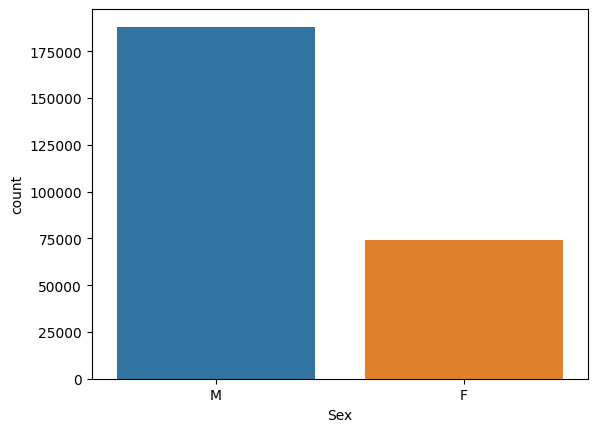

In [30]:
# Let's plot the data of Male and Female participation in Olympics.
sns.countplot(x = 'Sex', data = Olympic_2)

In [31]:
# What is the ratio of Male vs Female participant in 1900's olympic
male_count = olympic['Sex'][olympic.Sex =='M'][olympic.Year == 1900].count()
female_count = olympic['Sex'][olympic.Sex =='F'][olympic.Year == 1900].count()
total_count = olympic.query('Year == 1900').Sex.count()
print(male_count, female_count, total_count)
male_ratio = int((male_count/total_count)*100)
female_ratio = int((female_count/total_count)*100)
print(f"The Male-to-Female participation ratio in the Olympic in 1900 is {male_ratio}: {female_ratio}")

1903 33 1936
The Male-to-Female participation ratio in the Olympic in 1900 is 98: 1


In [32]:
female_athletes = olympic['Sex'][olympic.Sex =='F'][olympic.Year == 1900].count()
female_athletes

33

In [33]:
# What is the ratio of Male vs Female participant in the 1952's olympic
male_count = olympic['Sex'][olympic.Sex =='M'][olympic.Year == 1952].count()
female_count = olympic['Sex'][olympic.Sex =='F'][olympic.Year == 1952].count()
total_count = olympic.query('Year == 1952').Sex.count()
print(male_count, female_count, total_count)
male_ratio = int((male_count/total_count)*100)
female_ratio = int((female_count/total_count)*100)
print(f"The Male-to-Female participation ratio in the Olympic in 1952 is {male_ratio}: {female_ratio}")

7676 1682 9358
The Male-to-Female participation ratio in the Olympic in 1952 is 82: 17


In [34]:
# What is the ratio of Male vs Female participant in the last olympic i.e. 2016
male_count = olympic['Sex'][olympic.Sex =='M'][olympic.Year == 2016].count()
female_count = olympic['Sex'][olympic.Sex =='F'][olympic.Year == 2016].count()
total_count = olympic.query('Year == 2016').Sex.count()
print(male_count, female_count, total_count)
male_ratio = int((male_count/total_count)*100)
female_ratio = int((female_count/total_count)*100)
print(f"The Male-to-Female participation ratio in the Olympics in 2016 is {male_ratio}: {female_ratio}")

7465 6223 13688
The Male-to-Female participation ratio in the Olympics in 2016 is 54: 45


In [35]:
# Let's check the unique list of countries.
unique_list_of_countries = Olympic_2["NOC"].unique()

print("Unique list of coutries (NOC) - \n\n", unique_list_of_countries)
print("")
print("Length of countries(NOC) - ", len(unique_list_of_countries))

Unique list of coutries (NOC) - 

 ['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR' 'TUR'
 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ' 'UAR'
 'LIB' 'QAT' 'MAS' 'IRI' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR' 'TUN'
 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'KSA' 'SYR' 'MDV' 'ETH' 'UAE'
 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'SUI' 'BRA' 'GER'
 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV' 'KEN' 'BEN'
 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'MLI' 'IND' 'POL' 'CRC' 'PAN' 'GEO' 'SLO'
 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN' 'PER' 'ESA' 'PUR'
 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN' 'CZE' 'NIG' 'SKN'
 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW' 'LTU' 'TOG'
 'NAM' 'AHO' 'ISL' 'ASA' 'AFG' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP' 'GUI'
 'BIZ' 'YMD' 'KOR' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA' 'OMA' 'FIJ'
 'VAN' 'MDA' 'YU

# Which country won most number of medals in the history of olympics ?
Let's calculate -

Country with max gold medals

Country with max solver medals

Country with max bronze medals

Country with max total medals

In [36]:
medal_count_list = []

for country in unique_list_of_countries:
  gold = silver = bronze = 0
  medal_count = Olympic_2[Olympic_2["NOC"] == country]

  try:
    gold = medal_count["Medal"].value_counts()["Gold"]
  except KeyError:
    gold = 0

  try:
    silver = medal_count["Medal"].value_counts()["Silver"]
  except KeyError:
    silver = 0

  try:
    bronze = medal_count["Medal"].value_counts()["Bronze"]
  except KeyError:
    bronze = 0

  medal_dict = {}
  medal_dict = {
      "Country": country,
      "Gold": gold,
      "Silver": silver,
      "Bronze": bronze,
      "Total" : gold + silver + bronze
      }
  #print(country_medal_df)
  medal_count_list.append(medal_dict)

In [37]:
# Let's Get the medal count for each country
medal_count_df = pd.DataFrame(medal_count_list)
print(medal_count_df)

    Country  Gold  Silver  Bronze  Total
0       CHN   350     347     292    989
1       DEN   179     241     177    597
2       NED   287     340     413   1040
3       USA  2638    1641    1358   5637
4       FIN   198     270     432    900
..      ...   ...     ...     ...    ...
223     TUV     0       0       0      0
224     NFL     0       0       0      0
225     KOS     1       0       0      1
226     SSD     0       0       0      0
227     LES     0       0       0      0

[228 rows x 5 columns]


In [38]:
# Let's count the country with the maximum number of gold medals and plot a graph of the top 10 countries with gold medals.
max_gold_index = medal_count_df["Gold"].idxmax()
print("Country with Max Gold - ", medal_count_df.loc[max_gold_index]["Country"])
print("Number of Gold medals won - ", medal_count_df.loc[max_gold_index]["Gold"])

Country with Max Gold -  USA
Number of Gold medals won -  2638


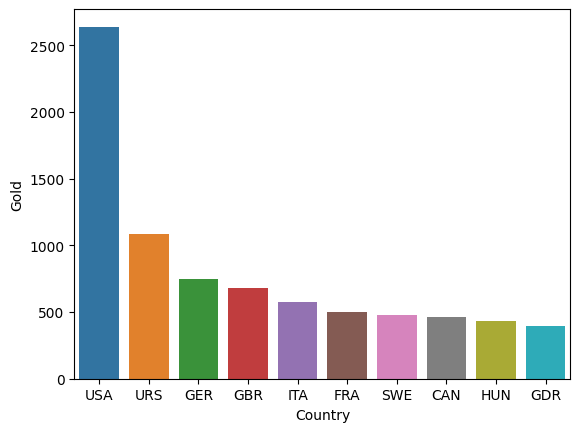

In [39]:
# Let's plot the graph of the top 10 countries with gold medals.
medal_count_df.sort_values("Gold", axis = 0, ascending = False, inplace = True)
sns.barplot(x = "Country", y = "Gold", data = medal_count_df.head(10));

In [40]:
# Let's count the country with the maximum number of silver medals and plot a graph of the top 10 countries with silver medals.
max_gold_index = medal_count_df["Silver"].idxmax()
print("Country with Max Silver - ", medal_count_df.loc[max_gold_index]["Country"])
print("Number of Silver medals won - ", medal_count_df.loc[max_gold_index]["Silver"])

Country with Max Silver -  USA
Number of Silver medals won -  1641


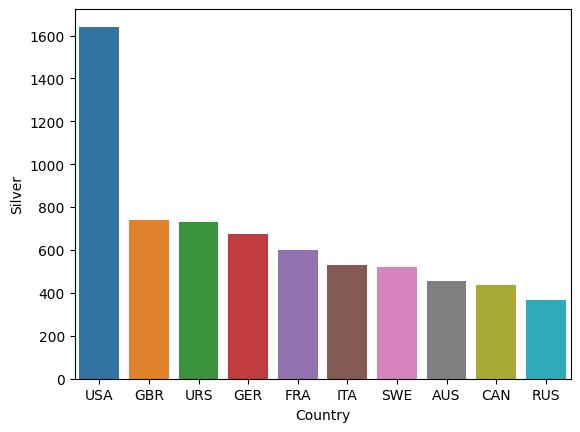

In [41]:
# Let's plot the graph of the top 10 countries with silver medals.
medal_count_df.sort_values("Silver", axis = 0, ascending = False, inplace = True)
sns.barplot(x = "Country", y = "Silver", data = medal_count_df.head(10));

In [42]:
# Let's count the country with the maximum number of bronzer medals and plot a graph of the top 10 countries with bronze medals.
max_gold_index = medal_count_df["Bronze"].idxmax()
print("Country with max Bronze  - ", medal_count_df.loc[max_gold_index]["Country"])
print("Number of Bronze medals won - ", medal_count_df.loc[max_gold_index]["Bronze"])

Country with max Bronze  -  USA
Number of Bronze medals won -  1358


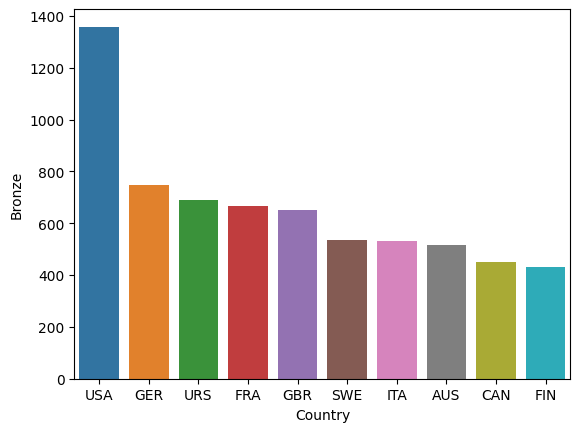

In [43]:
# Let's plot the graph of the top 10 countries with bronze medals.
medal_count_df.sort_values("Bronze", axis = 0, ascending = False, inplace = True)
sns.barplot(x = "Country", y = "Bronze", data = medal_count_df.head(10));

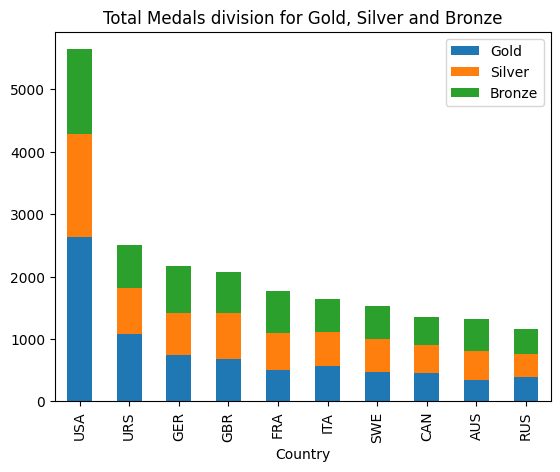

In [44]:
# Let us draw a stacked chart to show the total number of medals won by the top 10 winning countries, with stacks for the number of gold, silver, and bronze won.
medal_count_df.sort_values("Total", axis = 0, ascending = False, inplace = True)
temp_medal_df = medal_count_df.drop(["Total"], axis = 1)
temp_medal_df.head(10).plot(x = 'Country', kind='bar', stacked=True, title='Total Medals division for Gold, Silver and Bronze');

# Let's Prepare the data for Model building

Let's check the distribution of the columns of Age, Height, and Weight for the whole data.

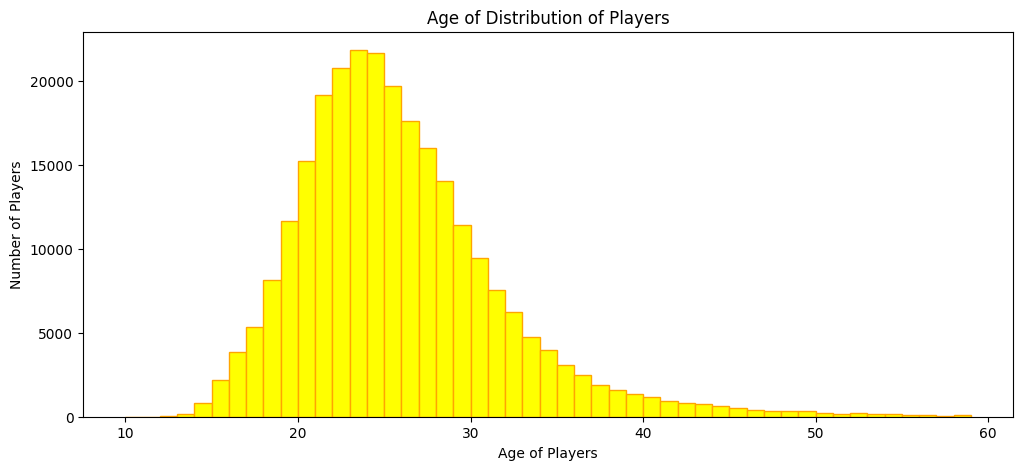

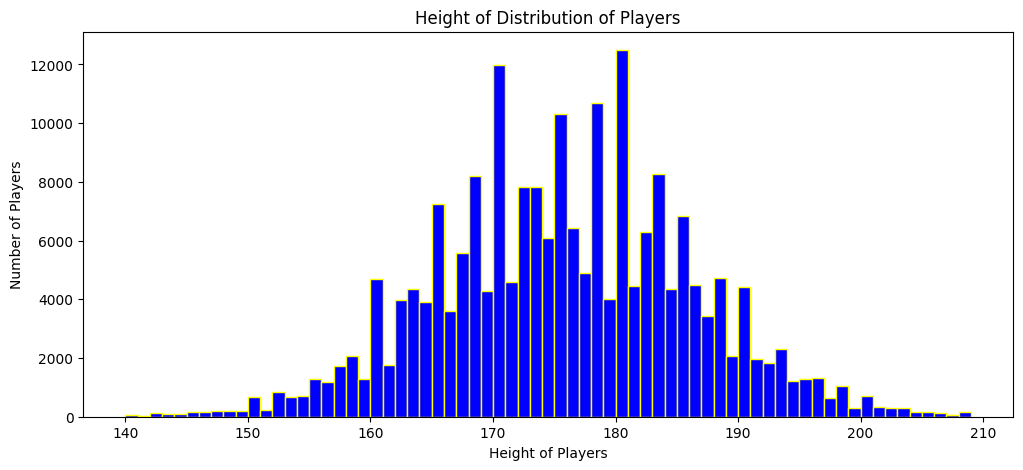

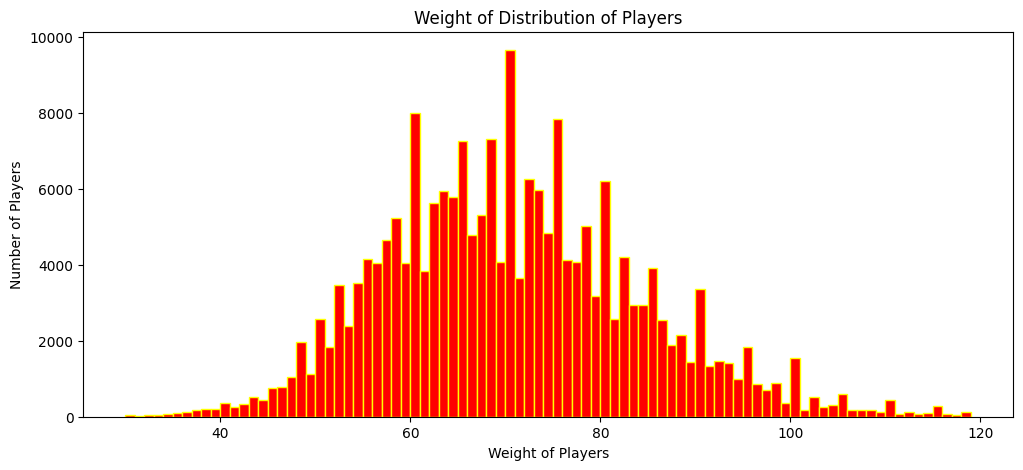

In [45]:
# Show the age distribution of players using histogram
plt.figure(figsize=(12,5))
plt.hist(Olympic_2.Age, bins = np.arange(10,60), color = 'Yellow', edgecolor = 'Orange')
plt.title('Age of Distribution of Players')
plt.xlabel('Age of Players')
plt.ylabel('Number of Players')
plt.show()
# Show the Height distribution of players using histogram
plt.figure(figsize=(12,5))
plt.hist(Olympic_2.Height, bins = np.arange(140,210), color = 'Blue', edgecolor = 'Yellow')
plt.title('Height of Distribution of Players')
plt.xlabel('Height of Players')
plt.ylabel('Number of Players')
plt.show()
# Show the Weight distribution of players using histogram
plt.figure(figsize=(12,5))
plt.hist(Olympic_2.Weight, bins = np.arange(30,120), color = 'Red', edgecolor = 'Yellow')
plt.title('Weight of Distribution of Players')
plt.xlabel('Weight of Players')
plt.ylabel('Number of Players')
plt.show()

# Let's check the Age, Height, and Weight distribution of only Male Athletes.

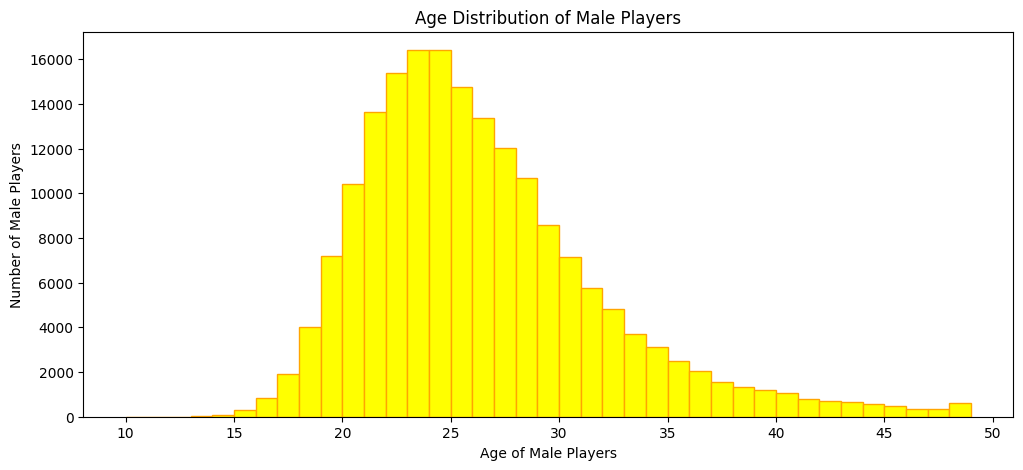

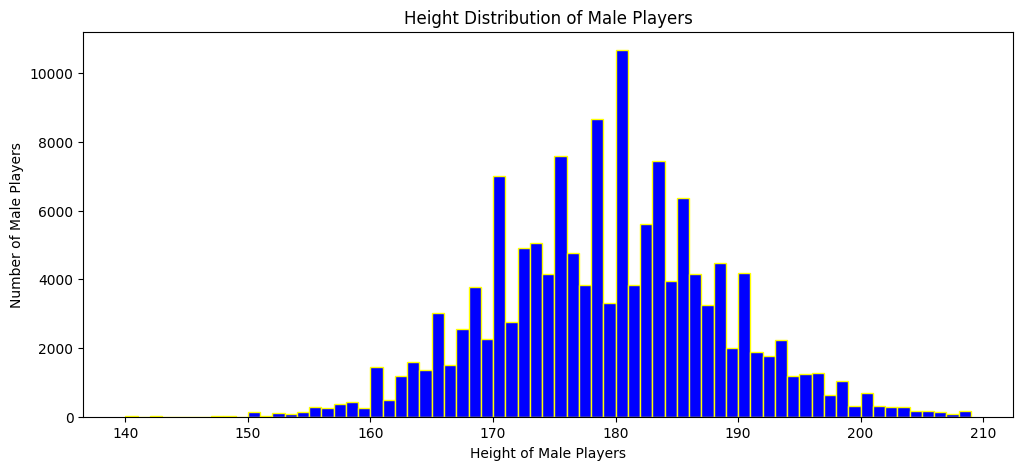

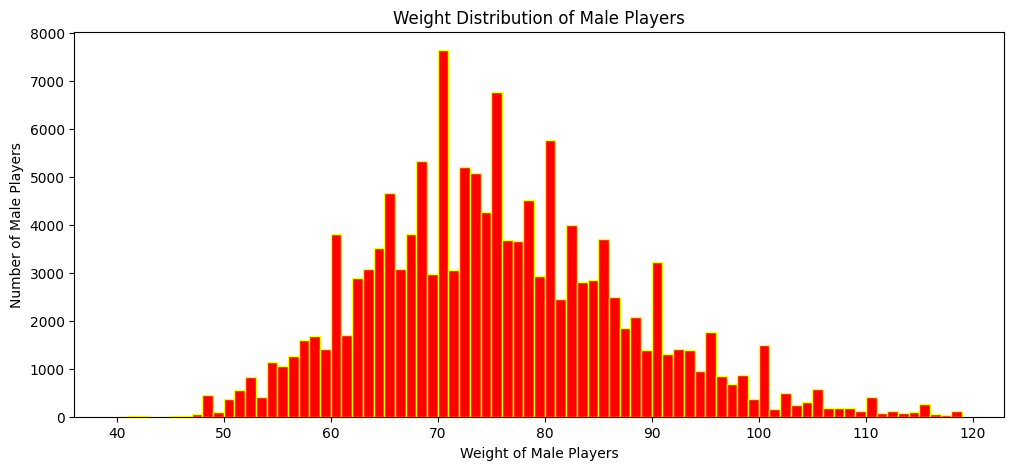

In [46]:
male_gender = Olympic_2[Olympic_2["Sex"]== "M"]
#Show the Age distribution of players using histogram
plt.figure(figsize=(12,5))
plt.hist(male_gender["Age"], bins = np.arange(10,50), color = 'Yellow', edgecolor = 'Orange')
plt.title('Age Distribution of Male Players')
plt.xlabel('Age of Male Players')
plt.ylabel('Number of Male Players')
plt.show()
# Show the Height distribution of players using histogram
plt.figure(figsize=(12,5))
plt.hist(male_gender["Height"], bins = np.arange(140,210), color = 'Blue', edgecolor = 'Yellow')
plt.title('Height Distribution of Male Players')
plt.xlabel('Height of Male Players')
plt.ylabel('Number of Male Players')
plt.show()
# Show the Weight distribution of players using histogram
plt.figure(figsize=(12,5))
plt.hist(male_gender["Weight"], bins = np.arange(40,120), color = 'Red', edgecolor = 'Yellow')
plt.title('Weight Distribution of Male Players')
plt.xlabel('Weight of Male Players')
plt.ylabel('Number of Male Players')
plt.show()

In [47]:
# Let's check the Average Age, Height and Weight of Male Athletes.
male_gender.mean(numeric_only = True)

ID        67622.342502
Age          26.151947
Height      178.859125
Weight       75.744091
Year       1975.040267
dtype: float64

In [48]:
# Let's check the median Age, Height and Weight for Male Athletes
male_gender.median(numeric_only = True)

ID        67235.0
Age          25.0
Height      179.0
Weight       74.0
Year       1980.0
dtype: float64

# Let's check the Age, Height, and Weight distribution of only Female Athletes.

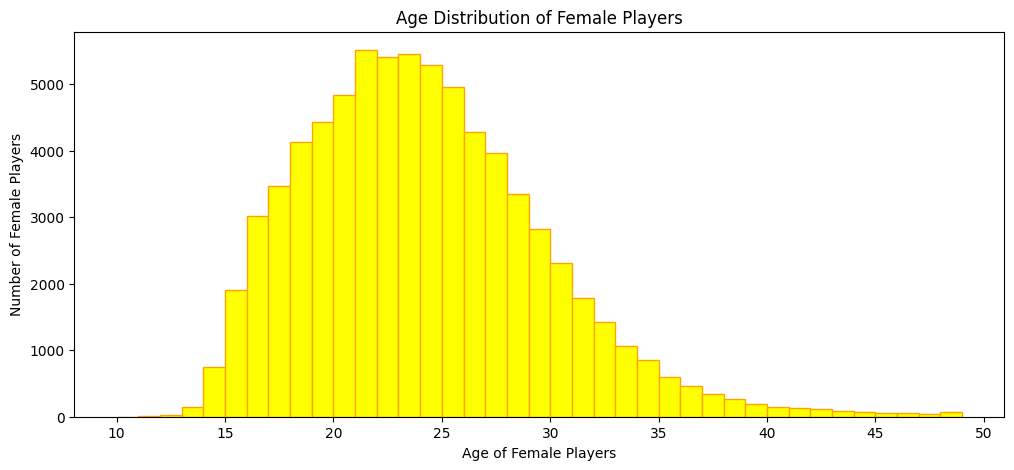

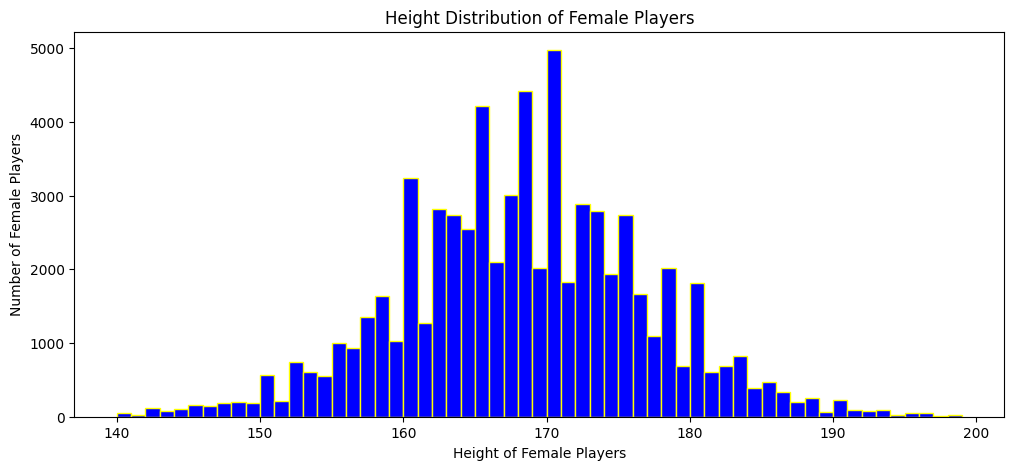

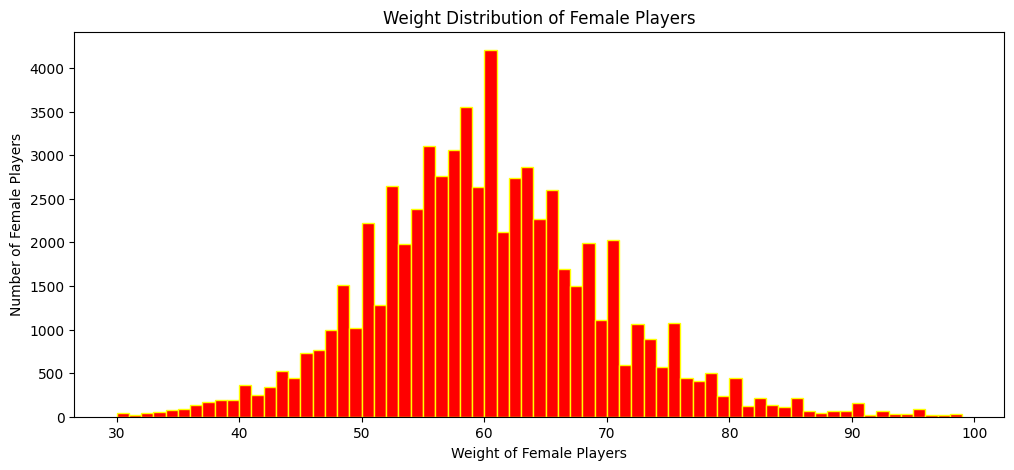

In [49]:
female_gender = Olympic_2[Olympic_2["Sex"]== "F"]
#Show the Age distribution of players using histogram
plt.figure(figsize=(12,5))
plt.hist(female_gender["Age"], bins = np.arange(10,50), color = "Yellow", edgecolor = "Orange" )
plt.title('Age Distribution of Female Players')
plt.xlabel('Age of Female Players')
plt.ylabel('Number of Female Players')
plt.show()
# Show the Height distribution of players using histogram
plt.figure(figsize=(12,5))
plt.hist(female_gender["Height"], bins = np.arange(140,200), color = "Blue", edgecolor = "Yellow" )
plt.title('Height Distribution of Female Players')
plt.xlabel('Height of Female Players')
plt.ylabel('Number of Female Players')
plt.show()
# Show the Weight distribution of players using histogram
plt.figure(figsize=(12,5))
plt.hist(female_gender["Weight"], bins = np.arange(30,100), color = "Red", edgecolor = "Yellow" )
plt.title('Weight Distribution of Female Players')
plt.xlabel('Weight of Female Players')
plt.ylabel('Number of Female Players')
plt.show()

In [50]:
# Let's check the Average Age, Height and Weight for Female Athletes
female_gender.mean(numeric_only = True)

ID        69946.108750
Age          23.697713
Height      167.839740
Weight       60.021252
Year       1992.808766
dtype: float64

In [51]:
# Let's check the median Age, Height and Weight for Female Athletes
female_gender.median(numeric_only = True)

ID        70101.5
Age          23.0
Height      168.0
Weight       59.0
Year       1998.0
dtype: float64

The distribution analysis showed above leads us to the conclusion that we must impute null values for age, height, and weight based on categorical values like sex. because male and female athletes' average and median values for age, height, and weight vary.

In [52]:
Olympic_2.isnull().sum()

ID             0
Name           0
Sex            0
Age         1740
Height     51239
Weight     53952
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     222384
Region       364
Notes     257376
dtype: int64

In [53]:
olympic_3 = olympic[~((pd.isnull(olympic['Height']))& (pd.isnull(olympic['Weight'])& (pd.isnull(olympic['Age']))& (pd.isnull(olympic['Medal'])))) ]

In [54]:
# Let's check for the duplicate ID
olympic_3.duplicated(subset=['ID'])

0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113     True
271114    False
271115     True
Length: 263386, dtype: bool

In [55]:
# Let's drop the duplicated ID
olympic_3.drop_duplicates(subset=['ID'], inplace = True)

<ipython-input-55-d15824bd2976>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympic_3.drop_duplicates(subset=['ID'], inplace = True)


In [56]:
olympic_3.isnull().sum()

ID             0
Name           0
Sex            0
Age         1398
Height     28946
Weight     29915
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     111319
Region       181
Notes     128182
dtype: int64

In [57]:
olympic_3.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
18,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,Finland,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN


# Let's impute the data with approximate values.

In [58]:
male_gender_0 = olympic_3[olympic_3["Sex"]== "M"]
female_gender_0 = olympic_3[olympic_3["Sex"]== "F"]

In [59]:
male_gender_0.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


In [60]:
male_gender_0.mean(skipna = True, numeric_only = True)

ID        67233.091160
Age          24.981509
Height      179.439633
Weight       76.466325
Year       1973.737350
dtype: float64

In [61]:
male_gender_0.median(skipna = True, numeric_only = True)

ID        66958.5
Age          24.0
Height      180.0
Weight       75.0
Year       1980.0
dtype: float64

In [62]:
female_gender_0.mean(skipna = True, numeric_only = True)

ID        69627.468616
Age          22.935810
Height      168.932010
Weight       61.278280
Year       1993.247250
dtype: float64

In [63]:
female_gender_0.median(skipna = True, numeric_only = True)

ID        69613.0
Age          22.0
Height      169.0
Weight       60.0
Year       2000.0
dtype: float64

In [64]:
male_gender_0.isnull().sum()

ID            0
Name          0
Sex           0
Age        1368
Height    25444
Weight    26050
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     82322
Region      122
Notes     94860
dtype: int64

In [65]:
female_gender_0.isnull().sum()

ID            0
Name          0
Sex           0
Age          30
Height     3502
Weight     3865
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     28997
Region       59
Notes     33322
dtype: int64

In [ ]:
# Let's impute the null values in Age column with median because the data is skewed.
male_gender_0['Age'].fillna(value = male_gender_0['Age'].median(skipna = True, numeric_only = True), inplace = True)

In [ ]:
# Let's impute the null values in height column with median because the data is skewed.
male_gender_0['Height'].fillna(value = male_gender_0['Height'].median(skipna = True, numeric_only = True), inplace = True)

In [ ]:
# Let's impute the null values in Weight column with mean because the data is close to normally distributed.
male_gender_0['Weight'].fillna(value = male_gender_0['Weight'].mean(skipna = True, numeric_only = True), inplace = True)

In [ ]:
# Let's impute the null values in Age column with median because the data is skewed.
female_gender_0['Age'].fillna(value = female_gender_0['Age'].median(skipna = True, numeric_only = True), inplace = True)

In [ ]:
# Let's impute the null values in Height column with mean because the data is close to normally distributed.
female_gender_0['Height'].fillna(value = female_gender_0['Height'].mean(skipna = True, numeric_only = True), inplace = True)

In [ ]:
# Let's impute the null values in Weight column with mean because the data is close to normally distributed.
female_gender_0['Weight'].fillna(value = female_gender_0['Weight'].mean(skipna = True, numeric_only = True), inplace = True)

In [72]:
# Let's check if there are any null values in the Age, Height and Weight column after imputation.
male_gender_0.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     82322
Region      122
Notes     94860
dtype: int64

In [73]:
# Let's check if there are any null values in the Age, Height and Weight column after imputation.
female_gender_0.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     28997
Region       59
Notes     33322
dtype: int64

In [145]:
# Let's Merge the two data frame into single dataframe.
frames = [male_gender_0, female_gender_0]
Olympic_4 = pd.concat(frames)
Olympic_4

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,76.466325,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,180.0,76.466325,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271062,135550,Vera Vasilyevna Zyatikova,F,27.0,161.0,53.000000,Belarus,BLR,2002 Winter,2002,Winter,Salt Lake City,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,NaN,Belarus,NaN
271076,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.000000,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,NaN
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.000000,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN,Greece,NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.000000,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN


In [147]:
# Now let's check how many null column we have in the new dataframe
Olympic_4.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     111319
Region       181
Notes     128182
dtype: int64

In [148]:
# Since the Notes column is not so important, let's drop it.
Olympic_4.drop(['Notes'], axis=1, inplace = True)

In [156]:
# Let's fill the NaN values in the Medal column with Not Won.
Olympic_4['Medal'].fillna("Not Won", inplace = True)
Olympic_4

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Not Won,China
1,2,A Lamusi,M,23.0,170.0,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Not Won,China
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,76.466325,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Not Won,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,180.0,76.466325,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
10,6,Per Knut Aaland,M,31.0,188.0,75.000000,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Not Won,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271062,135550,Vera Vasilyevna Zyatikova,F,27.0,161.0,53.000000,Belarus,BLR,2002 Winter,2002,Winter,Salt Lake City,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,Not Won,Belarus
271076,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.000000,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.000000,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",Not Won,Greece
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.000000,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia


In [160]:
# Let's change the null values in Region column using regions dataframe.
Olympic_4['Region'] = np.where(Olympic_4['NOC']== 'ROT', 'Refugee Olympics Team',Olympic_4['Region'])
Olympic_4['Region'] = np.where(Olympic_4['NOC']== 'SGP', 'Singapore',Olympic_4['Region'])
Olympic_4['Region'] = np.where(Olympic_4['NOC']== 'TUV', 'Tuvalu',Olympic_4['Region'])

In [161]:
Olympic_4.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
Region    0
dtype: int64

# We are done with the analysis, have successfully imputed the null values with appropriate values, and are ready to use this data for further model building.

# Thank You